# Logistic Regression Hypothesis Function

### Introducing our Problem

<img src="./cancer-dataset.png" width="20%">

In [ ]:
Regression 
* X - square feet, number of reviews
* listing price -> any real number, 10, 10.01, 10.02020202

Classification 
* X - mean area, mean concavity, diameter
* y -> 1, 0

Get a job or not?
Person gets to the nba or not?
1, 0

cancerous -> 1
benign -> 0

chicken is good
1, 2, 3, 4, 5

In [34]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [35]:
import pandas as pd
X = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = pd.Series(dataset['target'])

In [37]:
y.mean()

0.6274165202108963

In [4]:
X[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
X.shape

(569, 30)

### Visualizing our problem

In [41]:
cancerous_df = X[y == 1]
benign_df = X[y == 0]

In [ ]:
go.Scatter(x = cancerous_df['mean area'], y = cancerous_df['mean concavity'], 
           mode = 'markers', name = 'cancerous')
go.Scatter(x = benign_df['mean area'], y = benign_df['mean concavity'], 
           mode = 'markers', name = 'benign')

In [18]:
cancerous_df = X[y == 1]
benign_df = X[y == 0]

In [23]:
cancerous_trace = go.Scatter(x = cancerous_df['mean area'], 
                             y = cancerous_df['mean concavity'], 
                             name = 'cancerous', mode = 'markers')
benign_trace = go.Scatter(x = benign_df['mean area'], 
                             y = benign_df['mean concavity'], 
                             name = 'benign', mode = 'markers')

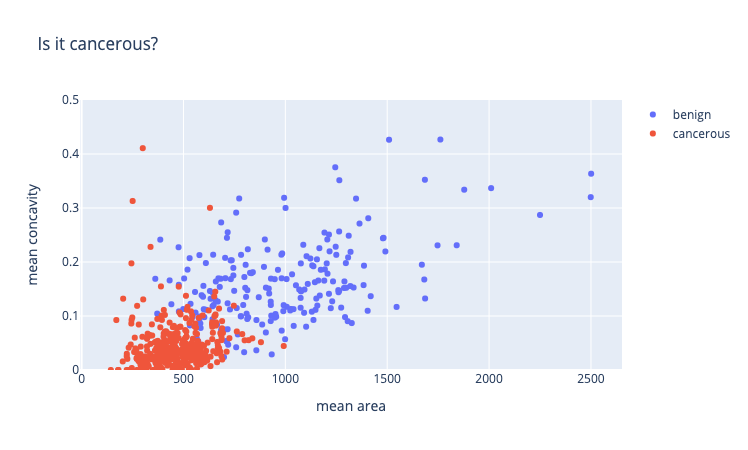

In [42]:
import plotly.graph_objects as go


layout = {'xaxis': {'title': 'mean area'},
          'yaxis': {'title': 'mean concavity', 
                    'range': [0, .5]}, 'title': 'Is it cancerous?'}
go.Figure([benign_trace, cancerous_scatter], layout = layout)

### Training a Model

In [44]:
X[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X[['mean area', 'mean concavity']], y)

LogisticRegression()

In [49]:
model.score(X[['mean area', 'mean concavity']], y)

0.8980667838312829

In [50]:
y.mean()

0.6274165202108963

In [46]:
model.coef_

array([[-0.01110101, -3.4118744 ]])

In [47]:
model.intercept_

array([7.84495707])

We can plot our decision boundary by calling the `decision_boundary_y` function below above with a range of values.

> **Note**: Don't worry about understanding the code below.  What's more important is the figure that follows.

In [31]:
area_values = list(range(500, 1000, 5))

def decision_boundary_y(x, coefs, intercept):
    coef_pair = coefs[0]
    return (coef_pair[0]/coef_pair[1])*x + intercept[0]/coef_pair[1]

boundaries = [decision_boundary_y(idx, model.coef_, model.intercept_) for idx in area_values]

In [68]:
import plotly.graph_objects as go
def decision_boundary_function(mean_area, mean_concavity):
    return -0.00802333*mean_area - 3.47361781 * mean_concavity + 5.86599622

decision_trace = go.Scatter(x=area_values, y=boundaries,
                            mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')

layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
fig = go.Figure([benign_scatter,cancerous_scatter,  decision_trace], layout = layout)


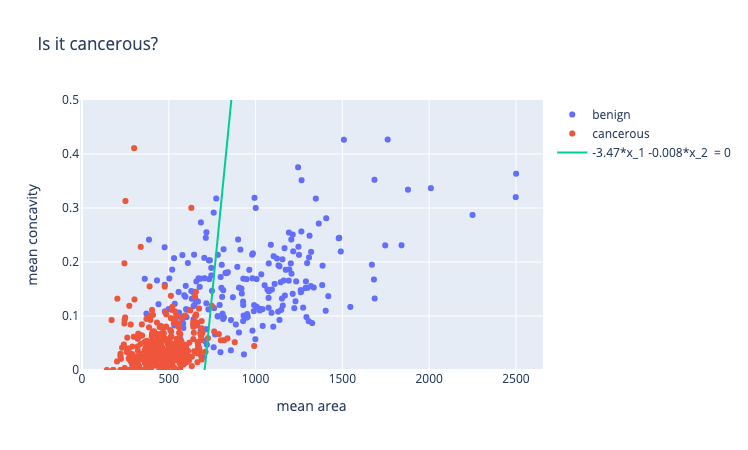

In [69]:
fig

In [27]:
model.coef_, model.intercept_

(array([[-0.00802333, -3.47361781]]), array([5.86599622]))

### Our predictions mathematically

In [53]:
model.coef_, model.intercept_

(array([[-0.01110101, -3.4118744 ]]), array([7.84495707]))

In [54]:
X[['mean area', 'mean concavity']][:2]

,mean area,mean concavity
0,1001.0,0.3001
1,1326.0,0.0869


In [55]:
def decision_function(mean_area, mean_concavity):
    return -0.01110101*mean_area + -3.4118744*mean_concavity + 7.84495707

In [62]:
decision_function(1326.0, .0869)

-7.17147407536

In [ ]:
decision_function(1001, .3001)

In [59]:
model.decision_function(X[['mean area', 'mean concavity']])[:3]

array([-4.29105527, -7.17147119, -6.18305935])

In [64]:
model.predict(X[['mean area', 'mean concavity']])[:3]

array([0, 0, 0])

In [159]:
model.coef_

array([[-0.00802333, -3.47361781]])

In [160]:
model.intercept_

array([5.86599622])

* seeing how it does

In [36]:
X[['mean area', 'mean concavity']][17:20]

,mean area,mean concavity
17,798.8,0.17220
18,1260.0,0.14790
19,566.3,0.06664


In [65]:
decision_function(798.8, 0.17220)

-1.6100544896799986

In [67]:
decision_function(566.3, 0.06664)

1.3310877969840016

In [34]:
updated_df = scoped_df.assign(y = y)
updated_df.loc[17:22, :]

,mean area,mean concavity,y
17,798.8,0.17220,0
18,1260.0,0.14790,0
19,566.3,0.06664,1
20,520.0,0.04568,1
21,273.9,0.02956,1
22,704.4,0.20770,0


### Summary

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)